In [220]:
from preprocessing_utils import *
import os
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from sklearn.preprocessing import LabelEncoder
import torch.nn.functional as F

In [221]:
df_stats = get_game_data()
Y = df_stats['Team1 result']
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)

df_stats = df_stats.loc[:, df_stats.columns.str.contains('Norm$|Year|Seed|Diff')]
df_stats = df_stats.drop(['Year','Seed Norm Diff'], axis=1)

In [229]:
df_stats.columns

Index(['W-L% Diff', 'SOS Diff', 'ORtg Diff', 'Drtg Diff', 'FG% Diff',
       'Seed Diff', 'WL% * SOS Diff', '3P% Diff', 'FT% Diff', 'PPG Diff',
       'OPPG Diff', 'APG Diff', 'TOVPG Diff', 'Adjusted WL% Diff',
       'Adjusted Margin Diff', 'W-L% Norm Diff', 'SOS Norm Diff',
       'ORtg Norm Diff', 'DRtg Norm Diff', 'FG% Norm Diff',
       'WL% * SOS Norm Diff', '3P% Norm Diff', 'FT% Norm Diff',
       'PPG Norm Diff', 'OPPG Norm Diff', 'APG Norm Diff', 'TOVPG Norm Diff',
       'Adjusted WL% Norm Diff', 'Adjusted Margin Norm Diff'],
      dtype='object')

In [228]:
df_stats[0:5]

,W-L% Diff,SOS Diff,ORtg Diff,Drtg Diff,FG% Diff,Seed Diff,WL% * SOS Diff,3P% Diff,FT% Diff,PPG Diff,...,FG% Norm Diff,WL% * SOS Norm Diff,3P% Norm Diff,FT% Norm Diff,PPG Norm Diff,OPPG Norm Diff,APG Norm Diff,TOVPG Norm Diff,Adjusted WL% Norm Diff,Adjusted Margin Norm Diff
0,-0.469169,-3.099065,-0.119093,0.055085,-0.101099,1.764706,-2.617002,-0.071987,-0.013564,-0.134744,...,-0.978743,-0.899400,-1.393613,-0.211531,-0.914089,-0.222661,-1.658315,-0.299235,-1.450358,-1.447090
1,-0.090303,0.181146,-0.079010,0.024147,-0.071111,0.117647,0.091220,-0.113323,0.037209,-0.109074,...,-0.761990,0.046731,-1.574169,1.000000,-0.613461,0.065404,-0.932886,-0.667815,-0.373061,-0.990717
2,0.028537,-3.083333,0.116584,0.082105,0.095652,0.823529,-3.123462,0.242503,0.057787,0.161505,...,0.846106,-0.656215,1.155321,0.463242,1.555676,-0.453065,0.258670,-0.352127,0.131809,0.308208
3,-0.021769,4.019646,0.054453,0.010650,0.006795,-1.058824,4.087284,0.019802,0.089936,-0.025154,...,0.089620,1.064504,0.138564,0.792517,-0.368882,0.217483,-0.372252,0.487717,-0.269568,0.319186
4,0.109569,-0.094148,-0.030853,-0.031811,-0.004396,0.588235,0.015467,-0.205607,-0.028747,0.080196,...,-0.042514,0.007836,-1.077005,-0.191836,0.476117,-0.516756,-0.204680,-0.464562,0.672271,-0.021924


In [222]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(df_stats)
X = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])

In [226]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 14 columns):
PC1     567 non-null float64
PC2     567 non-null float64
PC3     567 non-null float64
PC4     567 non-null float64
PC5     567 non-null float64
PC6     567 non-null float64
PC7     567 non-null float64
PC8     567 non-null float64
PC9     567 non-null float64
PC10    567 non-null float64
PC11    567 non-null float64
PC12    567 non-null float64
PC13    567 non-null float64
PC14    567 non-null float64
dtypes: float64(14)
memory usage: 62.1 KB


In [227]:
X[0:5]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-5.746328,4.568382,-5.100457,-0.179334,-0.157396,-0.441821,-0.150681,0.179467,-0.127546,0.225524,-0.462592,-0.761768,-0.134754,0.040962
1,-2.972337,1.147971,-2.904310,0.393820,0.652312,-0.401715,-1.614417,0.093177,-0.127631,-0.241009,-0.340836,0.012893,0.092588,-0.209802
2,-6.257068,4.263643,0.316641,-2.457936,-1.062248,0.131037,-0.095302,-0.069104,0.242631,0.691313,0.097028,-0.278631,0.044573,-0.415647
3,1.100250,-2.852967,-0.014621,0.230733,1.187203,-0.914771,-0.068758,-0.352441,-0.001719,0.186070,-0.207522,-0.192881,0.169261,0.198155
4,-3.056429,1.355659,-0.991581,-0.025264,-0.707850,0.755021,-0.876729,0.807117,-0.295949,0.487859,-0.270510,0.568590,-0.216797,0.045645


In [223]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        nfeatures = 14
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(nfeatures, 256)
        self.hidden1 = nn.Linear(256, 256)
        self.hidden2 = nn.Linear(256, 256)
        self.output = nn.Linear(256, 1)
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.hidden1(x)
        x = F.relu(x)
        x = self.hidden2(x)
        x = F.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        
        return x
    
model = Network()    

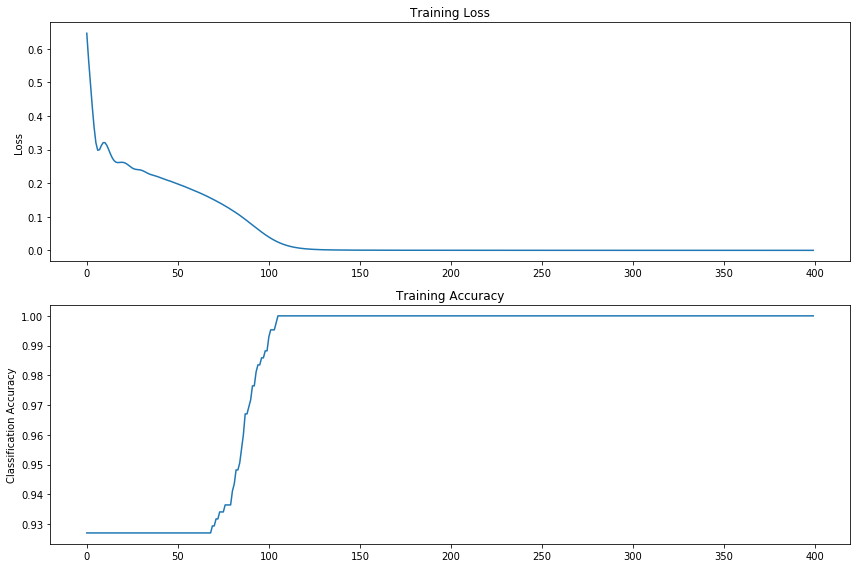

Train Accuracy 1.0000


In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=73)
X_train, X_test = X_train.values, X_test.values

loss_func = nn.BCELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss = []
train_accuracy = []
iters = 400
Y_train_t = torch.FloatTensor(Y_train).reshape(-1, 1)
for i in range(iters):
    X_train_t = torch.FloatTensor(X_train)
    y_hat = model(X_train_t)
    loss = loss_func(y_hat, Y_train_t)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    y_hat_class = np.where(y_hat.detach().numpy()<0.5, 0, 1)
    accuracy = np.sum(Y_train.reshape(-1,1)==y_hat_class) / len(Y_train)
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())
    
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracy)
ax[1].set_ylabel('Classification Accuracy')
ax[1].set_title('Training Accuracy')

plt.tight_layout()
plt.show()
print("Train Accuracy {:.4f}".format(max(train_accuracy)))

In [225]:
X_test_t = torch.FloatTensor(X_test)
y_hat_test = model(X_test_t)
y_hat_test_class = np.where(y_hat_test.detach().numpy()<0.5, 0, 1)
test_accuracy = np.sum(Y_test.reshape(-1,1)==y_hat_test_class) / len(Y_test)
print("Test Accuracy {:.2f}".format(test_accuracy))

Test Accuracy 0.93


In [232]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_hat_test_class)

array([[  0,   5],
       [  5, 132]])